In [26]:
# store the notebook directory (which is the current working directory, initially, but might be changed later)
if not 'notebookDir' in globals():
    notebookDir = os.getcwd()

In [28]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'Path.cwd()',
  'from fastai.vision import *\nfrom fastai.vision.all import *\nfrom pathlib import Path',
  'Path.cwd()',
  "td_path = Path.cwd / 'training' / 'training_data' / 'perfect left and right turn, from short and long end'\nall_path = td_path.rglob('*')\n[x.name for x in all_path if x.is_dir()]",
  "td_path = Path(Path.cwd) / 'training' / 'training_data' / 'perfect left and right turn, from short and long end'\nall_path = td_path.rglob('*')\n[x.name for x in all_path if x.is_dir()]",
  "td_path = Path(Path.cwd) / 'training' / 'training_data' / 'perfect left and right turn, from short and long end'\n#all_path = td_path.rglob('*')\n#[x.name for x in all_path if x.is_dir()]",
  "td_path = Path.cwd / 'train

In [2]:
from fastai.vision import *
from fastai.vision.all import *
from pathlib import Path

In [ ]:
#from fastai.utils.show_install import *
#show_install()

In [24]:
td_path = Path(notebookDir) / 'training_data' / 'perfect left and right turn, from short and long end'
all_path = td_path.rglob('*')
[x.name for x in all_path if x.is_dir()]

['Forward', 'ForwardLeft', 'ForwardRight']

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


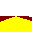

In [4]:
#fnames = get_image_files(td_path)

#def label_func(x): return x.parent.name

#data = ImageDataLoaders.from_path_func(td_path, fnames, label_func, valid_pct=0.2, batch_tfms=Normalize.from_stats(*imagenet_stats))

data = ImageDataLoaders.from_folder(td_path, valid_pct=0.2, batch_tfms=Normalize.from_stats(*imagenet_stats))
#data.normalize(imagenet_stats)
img,label = data.train_ds[0]
label = data.vocab[label]
img

In [5]:
learn = cnn_learner(data, models.resnet18, pretrained=True, metrics=accuracy)

In [10]:
learn.fit_one_cycle(20, 0.01) # unsteady left turn

epoch,train_loss,valid_loss,accuracy,time
0,0.008576,0.006924,0.997067,00:02
1,0.013656,0.005057,0.997067,00:02
2,0.015639,0.089720,0.988270,00:02
3,0.065326,0.621144,0.938416,00:02
4,0.127445,0.129629,0.967742,00:02
5,0.162109,0.252817,0.938416,00:02
6,0.154813,0.405518,0.935484,00:02
7,0.134049,0.050182,0.988270,00:02
8,0.115343,0.233057,0.900293,00:02
9,0.098718,0.008840,0.997067,00:02


In [11]:
model_suffix = "" # adapt to prevent overwriting existing models
model_name = td_path.name + model_suffix
learn.export(td_path.parent / 'controller' / 'models' / (model_name + '.pkl'))

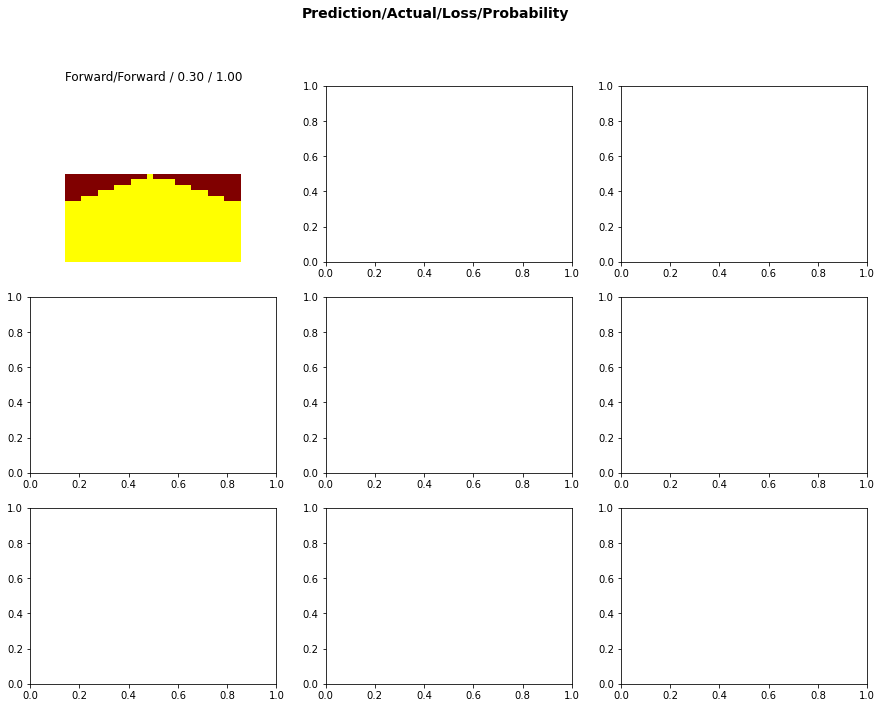

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))